<a href="https://colab.research.google.com/github/jaymey/CAP5610/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import metrics
from sklearn.decomposition import PCA
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
# train = pd.read_csv("/content/drive/MyDrive/ML Project Fall 2021/train.csv.zip (Unzipped Files)/train.csv")
# test = pd.read_csv("/content/drive/MyDrive/ML Project Fall 2021/test.csv.zip (Unzipped Files)/test.csv")

train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(train.shape)
train.describe()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

The training dataset containes 42,000 rows and 785 columns.
Each row contains a label and 784 pixel values which make up a 28 x 28 pixel image of a handwritten digit.
The label column value represents the assigned label of that row as a digit from 0 through 9.

Each pixel in the image is given as a value between 0 and 255 inclusive representing the intensity of that pixel in the image. A 0 meaning black and 255 meaning a white pixel.

We can see that many of the pixel features contain no values which means they lend no information to assist us in our classification problem. 
These pixels will not be useful and we remove them from the dataset through dimensionality reduction.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

y = train["label"]
X = train.copy().drop("label", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1234)

X_std = StandardScaler().fit_transform(X)


## PCA

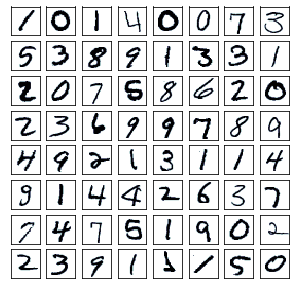

In [ ]:
plt.figure(figsize = (5,5))
for digit_num in range(0,64):
    plt.subplot(8,8,digit_num+1)
    grid_data = X.iloc[digit_num].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    plt.xticks([])
    plt.yticks([])

In [ ]:
# check performance of random forest classifier, as function of number of estimators 
# here we only take 1000 data points to train

n_estimators_array = np.array([1,5,10,50,100,200,500])
n_samples = 10
n_grid = len(n_estimators_array)
score_array_mu =np.zeros(n_grid)
score_array_sigma = np.zeros(n_grid)
j=0
for n_estimators in n_estimators_array:
    score_array=np.zeros(n_samples)
    for i in range(0,n_samples):
        clf = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
        clf.fit(X_train.iloc[0:1000], y_train.iloc[0:1000])
        score_array[i] = clf.score(X_test.iloc[0:1000], y_test.iloc[0:1000])
    score_array_mu[j], score_array_sigma[j] = np.mean(score_array), np.std(score_array)
    j=j+1

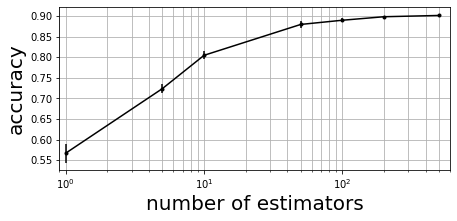

In [ ]:
plt.figure(figsize = (7,3))
plt.errorbar(n_estimators_array, score_array_mu, yerr=score_array_sigma, fmt='k.-')
plt.xscale("log")
plt.xlabel("number of estimators",size = 20)
plt.ylabel("accuracy",size = 20)
plt.xlim(0.9,600)
plt.grid(which="both")

Text(0, 0.5, 'PC2')

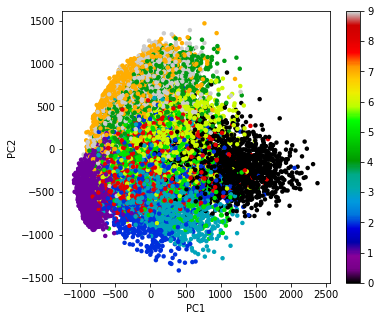

In [ ]:
pca = PCA(n_components=200)
pca.fit(X_train)
transform = pca.transform(X_test)

plt.figure(figsize = (6,5))
plt.scatter(transform[:,0],transform[:,1], s=20, c = y_test, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.clim(0,9)

plt.xlabel("PC1")
plt.ylabel("PC2")

In [ ]:
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
vr = np.zeros(len(n_components_array))
i=0;
for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    vr[i] = sum(pca.explained_variance_ratio_)
    i=i+1   

Text(0, 0.5, 'variance ratio')

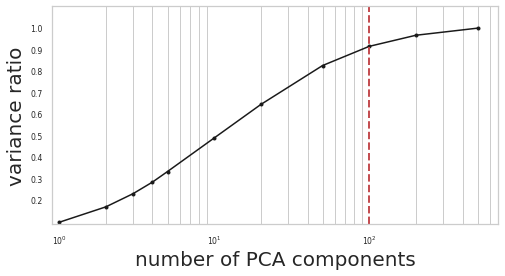

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(n_components_array,vr,'k.-')
plt.xscale("log")
plt.ylim(9e-2,1.1)
plt.yticks(np.linspace(0.2,1.0,9))
plt.xlim(0.9)
plt.grid(which="both")
plt.axvline(linewidth=2, color='r', linestyle = '--', x=100, ymin=0, ymax=1)
plt.xlabel("number of PCA components",size=20)
plt.ylabel("variance ratio",size=20)

In [ ]:
#rfc = RandomForestClassifier()
n_components_array=([5,10,20,50,100, 200, 500])
score_array = np.zeros(len(n_components_array))
i = 0

#for n_components in n_components_array:
# pca = PCA(n_components=100)
# pca.fit(X_train.iloc[0:1000])
# transform = pca.transform(X_train.iloc[0:1000])
# rfc.fit(transform, y_train.iloc[0:1000])
# y_pred = rfc.predict(X_test.iloc[0:1000])
# accuracy_score(y_test.iloc[0:1000], y_pred)

j=0
for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(X_train.iloc[0:1000])
    transform = pca.transform(X_train.iloc[0:1000])
    rfc = RandomForestClassifier(criterion="gini")
    rfc.fit(transform, y_train.iloc[0:1000])
    y_pred = rfc.predict(pca.transform(X_test.iloc[0:1000]))
    score_array[i] = accuracy_score(y_test.iloc[0:1000], y_pred))
    # score_array=np.zeros(n_samples)
    # for i in range(0,n_samples):
    #     clf = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
    #     clf.fit(X_train.iloc[0:1000], y_train.iloc[0:1000])
    #     score_array[i] = clf.score(X_test.iloc[0:1000], y_test.iloc[0:1000])
    # score_array_mu[j], score_array_sigma[j] = np.mean(score_array), np.std(score_array)
    i=i+1


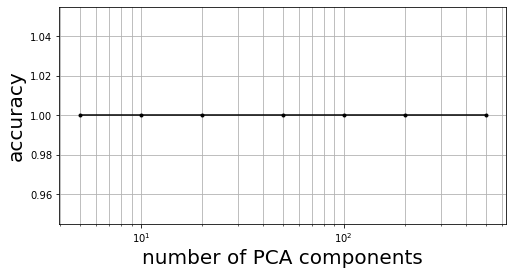

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(n_components_array,score_array,'k.-')
plt.xscale('log')
plt.xlabel("number of PCA components", size=20)
plt.ylabel("accuracy", size=20)
plt.grid(which="both")

##Dimensionality Reduction

Since our dataset consists of a large number of features, with many columns having no values in them or very few, we can exploit this to reduce the dimensionality of the data.

First, we will want to save our labels and separate them from the dataset for future use.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

1.0

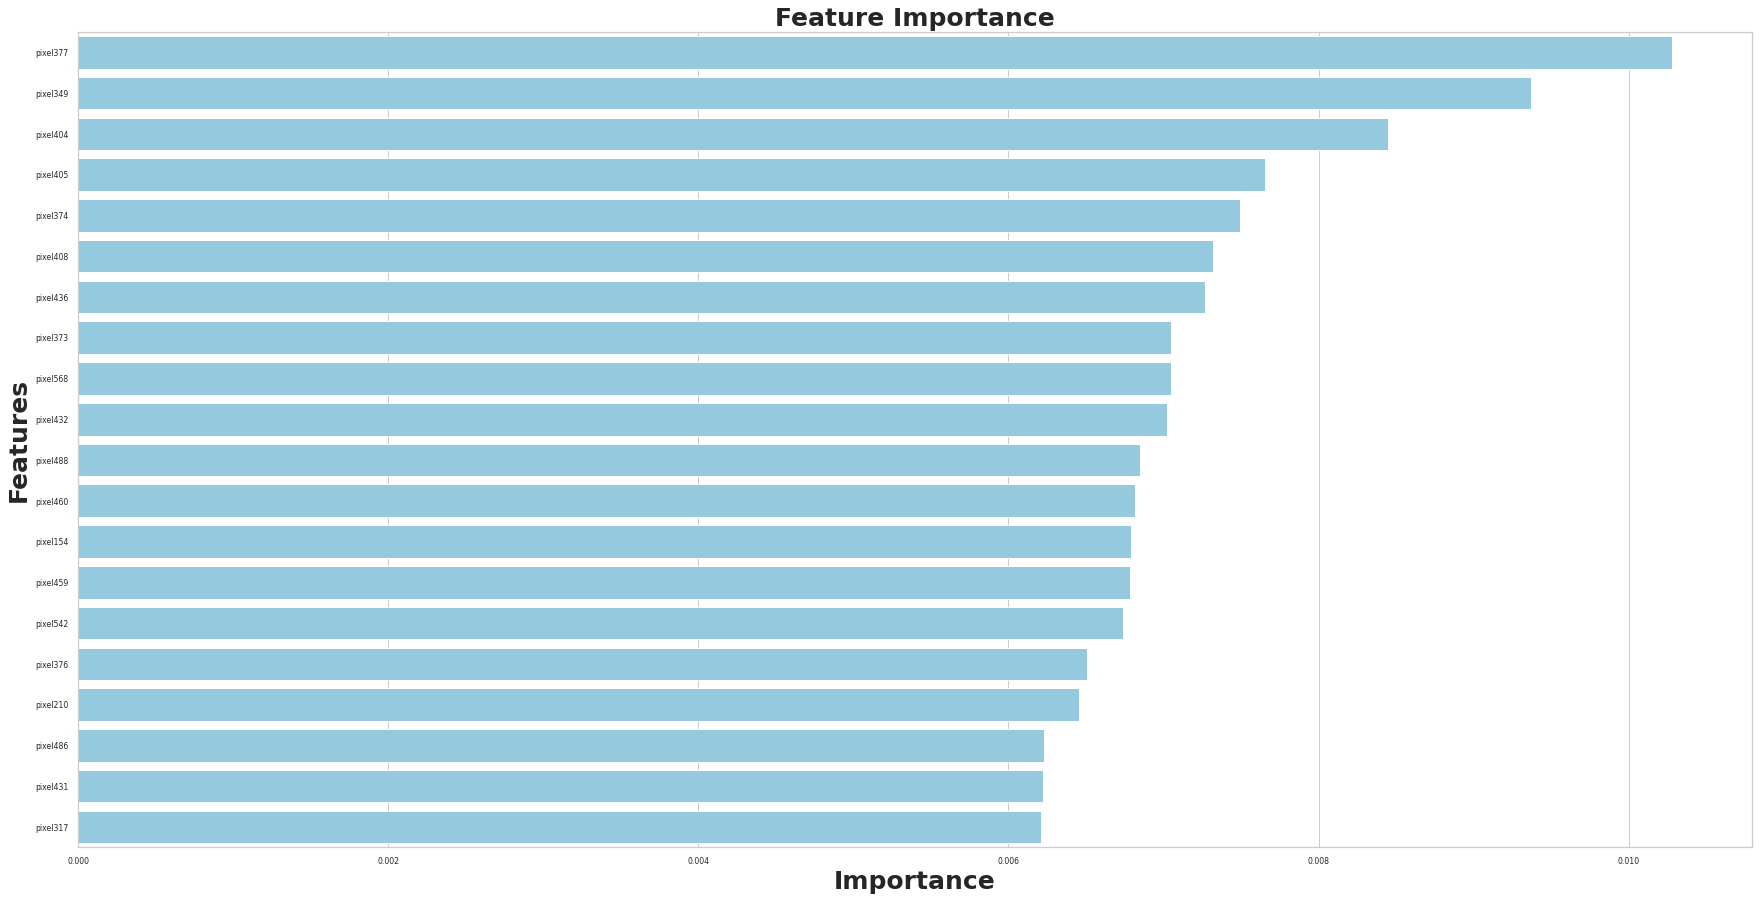

,Features,Gini-Importance
0,pixel377,0.010281
1,pixel349,0.009372
2,pixel404,0.008449
3,pixel405,0.007656
4,pixel374,0.007493
...,...,...
779,pixel307,0.000000
780,pixel334,0.000000
781,pixel335,0.000000
782,pixel336,0.000000


0      0.010281
1      0.009372
2      0.008449
3      0.007656
4      0.007493
         ...   
267    0.001256
268    0.001250
269    0.001237
270    0.001227
271    0.001227
Name: Gini-Importance, Length: 272, dtype: float64

0.9016434852397099

In [ ]:
features = {}
for feature, importance in zip(train.columns, rfc.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame.from_dict(features, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

sns.set(font_scale = 0.1)
sns.set(style="whitegrid", color_codes=True, font_scale = 0.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'][importances['Gini-Importance'] > 0.006], y=importances['Features'][importances['Gini-Importance'] > 0.006], data=importances[importances['Gini-Importance'] > 0.006], color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
plt.show()
display(importances)
display((importances['Gini-Importance'][importances['Gini-Importance'] > 0.0012]))
display(sum(importances['Gini-Importance'][importances['Gini-Importance'] > 0.0012]))

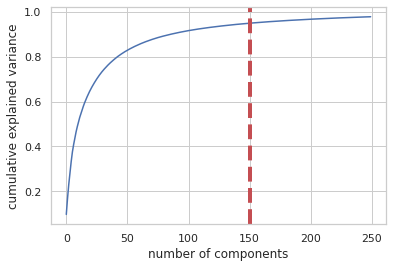

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.097062,0.097062
1,0.167970,0.070908
2,0.229812,0.061842
3,0.283279,0.053467
4,0.332245,0.048965
...,...,...
145,0.946957,0.000491
146,0.947444,0.000487
147,0.947925,0.000481
148,0.948397,0.000472


In [ ]:
pca_test = PCA(n_components=250)
pca_test.fit(X_train)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=150, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(100))

We will attempt to reduce the dimensionality by employing Principal Component analysis or PCA.
PCA allows us to project the features of the dataset onto a smaller set of features and still retain the majority of the information held by those features.
By performing this reduction, we will be able to reduce our feature space and still retain the necessary information to classify the images. 

In [ ]:
pca = PCA(n_components=20)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

rfc_pca = RandomForestClassifier()
rfc_pca.fit(X_train_pca, y_train)

rfc_baseline = RandomForestClassifier()
rfc_baseline.fit(X_train, y_train)

display(rfc.score(X_train_pca, y_train))

1.0

In [ ]:
y_pred = rfc_baseline.predict(X_test)
y_pred_pca = rfc_pca.predict(X_test_pca)

display('Baseline Random Forest accuracy score', accuracy_score(y_test, y_pred))
display('Baseline Random Forest With PCA accuracy score', accuracy_score(y_test, y_pred_pca))

# rfc2 = RandomForestClassifier()
# rfc2.fit(X_train, y_train)
# y_pred = rfc2.predict(X_test)
# display(accuracy_score(y_test, y_pred))

'Baseline Random Forest accuracy score'

0.9572380952380952

'Baseline Random Forest With PCA accuracy score'

0.9324285714285714

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
score_array = np.zeros(len(n_components_array))
i=0

for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    transform = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    clf.fit(transform, y_train)
    predict = clf.predict(X_test_pca)
    score_array[i] = accuracy_score(y_test, predict)
    i=i+1

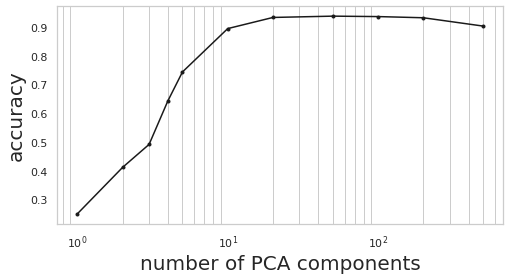

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(n_components_array,score_array,'k.-')
plt.xscale('log')
plt.xlabel("number of PCA components", size=20)
plt.ylabel("accuracy", size=20)
plt.grid(which="both")

## RFC

In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1234)

In [ ]:
# number of trees used
print('Number of Trees used : ', model.n_estimators)

Number of Trees used :  100


In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
predict= model.predict(X)
predict

array([1, 0, 1, ..., 7, 6, 9])

In [ ]:
from sklearn.metrics import accuracy_score
trainaccuracy= accuracy_score(y_test, model.predict(X_test))
trainaccuracy
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))

Train Data Accuracy    :94.7 %


In [ ]:
cm= metrics.confusion_matrix(y_test,model.predict(X_test))
cm

array([[3271,    0,    4,    3,    4,    8,   28,    0,   27,    3],
       [   0, 3674,   19,   14,    5,    6,    7,    8,    6,    4],
       [  23,    9, 3136,   29,   26,    4,   26,   37,   37,    8],
       [  12,   17,   63, 3207,    4,   78,    8,   33,   50,   22],
       [   5,    8,   10,    0, 3088,    3,   20,    5,   17,   96],
       [  23,   13,    7,   60,   16, 2843,   31,    5,   28,   25],
       [  26,    6,   13,    0,   10,   29, 3195,    0,   14,    0],
       [   3,   16,   48,    5,   29,    2,    0, 3315,   16,   95],
       [   5,   30,   18,   61,   13,   29,   24,    5, 2981,   50],
       [  17,    7,    8,   56,   54,   15,    2,   38,   33, 3109]])

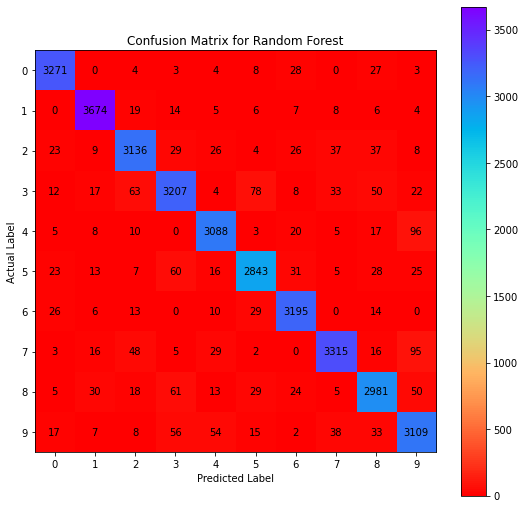

In [ ]:
plt.figure(figsize=(9,9))
plt.imshow(cm,cmap='rainbow_r')
plt.title("Confusion Matrix for Random Forest")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm.shape
for x in range(width):
    for i in range(height):
        plt.annotate(str(cm[x][i]),xy=(i,x),horizontalalignment='center',verticalalignment='center')
plt.show()

This is overfitted, let's do hyper-parameter tuning


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
rand_params = {
    'max_depth' : range(1,21,5),
    'min_samples_leaf' : range(1, 51, 10),
    'max_features' : range(1,5,2),
    'n_estimators' : range (80, 161, 20)
    }
rand_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rand_rf_pca = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_rand = RandomizedSearchCV(rand_rf, param_distributions=rand_params, cv=5, scoring='accuracy', verbose=3, random_state=0)
rf_rand_pca = RandomizedSearchCV(rand_rf_pca, param_distributions=rand_params, cv=5, scoring='accuracy', verbose=3, random_state=0)


In [ ]:
rf_rand.fit(X_train, y_train)
rf_rand_pca.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=1, max_features=1, min_samples_leaf=31, n_estimators=140;, score=0.516 total time=   0.8s
[CV 2/5] END max_depth=1, max_features=1, min_samples_leaf=31, n_estimators=140;, score=0.511 total time=   0.6s
[CV 3/5] END max_depth=1, max_features=1, min_samples_leaf=31, n_estimators=140;, score=0.521 total time=   0.7s
[CV 4/5] END max_depth=1, max_features=1, min_samples_leaf=31, n_estimators=140;, score=0.508 total time=   0.6s
[CV 5/5] END max_depth=1, max_features=1, min_samples_leaf=31, n_estimators=140;, score=0.516 total time=   0.7s
[CV 1/5] END max_depth=16, max_features=1, min_samples_leaf=41, n_estimators=80;, score=0.752 total time=   0.6s
[CV 2/5] END max_depth=16, max_features=1, min_samples_leaf=41, n_estimators=80;, score=0.754 total time=   0.5s
[CV 3/5] END max_depth=16, max_features=1, min_samples_leaf=41, n_estimators=80;, score=0.734 total time=   0.6s
[CV 4/5] END max_depth=16, max_feat

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': range(1, 21, 5),
                                        'max_features': range(1, 5, 2),
                                        'min_samples_leaf': range(1, 51, 10),
                                        'n_estimators': range(80, 161, 20)},
                   random_state=0, scoring='accuracy', verbose=3)

In [ ]:
rf_rand.best_estimator_

RandomForestClassifier(max_depth=16, max_features=3, n_estimators=120,
                       n_jobs=-1, random_state=42)

In [ ]:
rf_rand_pca.best_estimator_

RandomForestClassifier(max_depth=16, max_features=3, n_estimators=120,
                       n_jobs=-1, random_state=42)

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
classifier_rf_pca = RandomForestClassifier(random_state=42, n_jobs=-1)


In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [14,15,16,17,18],
    'max_features': [2,3,4],
    'n_estimators': [110, 120, 130, 140, 150]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=3, scoring = "accuracy")

grid_search_pca = GridSearchCV(estimator=classifier_rf_pca, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=3, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train,y_train)
grid_search_pca.fit(X_train_pca, y_train)


Fitting 4 folds for each of 75 candidates, totalling 300 fits
Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [14, 15, 16, 17, 18],
                         'max_features': [2, 3, 4],
                         'n_estimators': [110, 120, 130, 140, 150]},
             scoring='accuracy', verbose=3)

In [ ]:
rf_best = grid_search.best_estimator_
rf_best_pca = grid_search_pca.best_estimator_
grid_search.best_score_
grid_search_pca.best_score_

0.9253571428571428

In [ ]:
rf_best

RandomForestClassifier(max_depth=17, max_features=4, n_estimators=130,
                       n_jobs=-1, random_state=42)

In [ ]:
rf_best_pca

RandomForestClassifier(max_depth=17, max_features=2, n_estimators=130,
                       n_jobs=-1, random_state=42)

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'n_estimators': [110, 120, 130, 140, 150]
}

In [ ]:
# Instantiate the grid search model
grid_search_est = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=3, scoring = "accuracy")

grid_search_pca_est = GridSearchCV(estimator=classifier_rf_pca, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=3, scoring = "accuracy")

In [ ]:
grid_search_est.fit(X_train,y_train)
grid_search_pca_est.fit(X_train_pca, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1, param_grid={'n_estimators': [110, 120, 130, 140, 150]},
             scoring='accuracy', verbose=3)

In [ ]:
grid_search_est.best_score_
rf_best = grid_search_est.best_estimator_

In [ ]:
grid_search_pca_est.best_score_

0.9178571428571428

In [ ]:
cm= metrics.confusion_matrix(y_test,rf_best.predict(X_test))
cm

array([[3276,    0,    4,    1,    4,   10,   24,    1,   26,    2],
       [   0, 3670,   20,   11,    5,    4,   11,   10,    7,    5],
       [  24,    8, 3138,   35,   23,    0,   29,   35,   36,    7],
       [   9,   11,   65, 3222,    5,   81,    7,   27,   45,   22],
       [   5,    6,    9,    0, 3097,    1,   25,    5,   13,   91],
       [  24,   17,    6,   70,   10, 2832,   34,    6,   26,   26],
       [  25,    6,    8,    0,    6,   27, 3203,    0,   17,    1],
       [   5,   15,   54,    5,   29,    0,    0, 3317,   13,   91],
       [   8,   26,   19,   45,   15,   28,   17,    7, 2995,   56],
       [  18,    9,    7,   51,   62,   11,    3,   29,   38, 3111]])

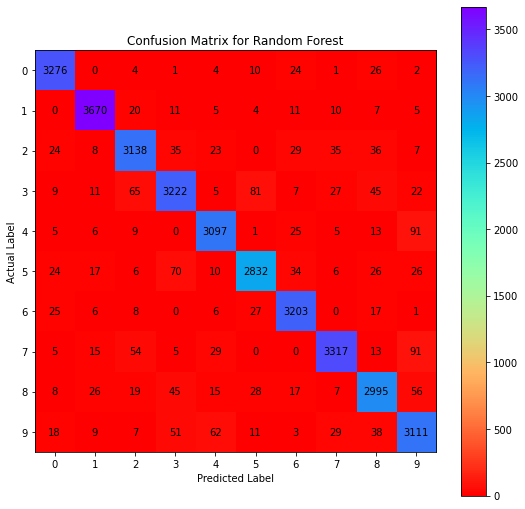

In [ ]:
plt.figure(figsize=(9,9))
plt.imshow(cm,cmap='rainbow_r')
plt.title("Confusion Matrix for Random Forest")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

In [ ]:
# predict result
result = model.predict(X_test)


result = pd.Series(result,name="Label")

In [ ]:
pca = PCA(n_components=20)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

rfc_pca = RandomForestClassifier()
rfc_pca.fit(X_train_pca, y_train)

rfc_baseline = RandomForestClassifier()
rfc_baseline.fit(X_train, y_train)
rfc_baseline.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_best.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred = rfc_baseline.predict(X_test)
y_pred_pca = rfc_pca.predict(X_test_pca)
y_pred_tuned = rf_best.predict(X_test)
y_pred_tuned_pca = rf_best_pca.predict(X_test_pca)

test_accuracy = accuracy_score(y_test, y_pred)
test_tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

test_pca_accuracy = accuracy_score(y_test, y_pred_pca)
test_tuned_pca_accuracy = accuracy_score(y_test, y_pred_tuned_pca)

print("Baseline Random Forest accuracy score:\t\t\t\t{} %".format(round((test_accuracy*100),2)))
print("Hypertuned Param Random Forest accuracy score:\t\t\t{} %".format(round((test_tuned_accuracy*100),2)))
print("Baseline Random Forest With PCA accuracy score:\t\t\t{} %".format(round((test_pca_accuracy*100),2)))
print("Hypertuned Param Random Forest With PCA accuracy score:\t\t{} %".format(round((test_tuned_pca_accuracy*100),2)))

Baseline Random Forest accuracy score:				94.71 %
Hypertuned Param Random Forest accuracy score:			94.82 %
Baseline Random Forest With PCA accuracy score:			92.09 %
Hypertuned Param Random Forest With PCA accuracy score:		92.69 %


#XGBoost Classifier

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1234)

In [ ]:
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_train, y_train, cv=5)
scores.mean()

0.9186904761904762

In [ ]:
xgb.fit(X_train, y_train)
cm= metrics.confusion_matrix(y_test, xgb.predict(X_test))
cm

array([[3232,    0,    8,    6,    4,   19,   25,    9,   36,    9],
       [   1, 3658,   15,   15,    2,   16,    9,    9,   15,    3],
       [  23,   21, 3039,   52,   36,    5,   39,   42,   61,   17],
       [  15,   27,   70, 3114,    6,  100,   18,   37,   61,   46],
       [   6,   12,   12,    2, 2990,    6,   19,    7,   30,  168],
       [  35,   32,   14,   77,   23, 2729,   45,   14,   43,   39],
       [  24,   12,    9,    0,   27,   51, 3127,    9,   34,    0],
       [  12,   21,   50,   18,   40,   11,    0, 3239,   10,  128],
       [   6,   57,   29,   61,   16,   39,   28,   14, 2900,   66],
       [  16,   12,    7,   46,  100,   19,    2,   75,   34, 3028]])

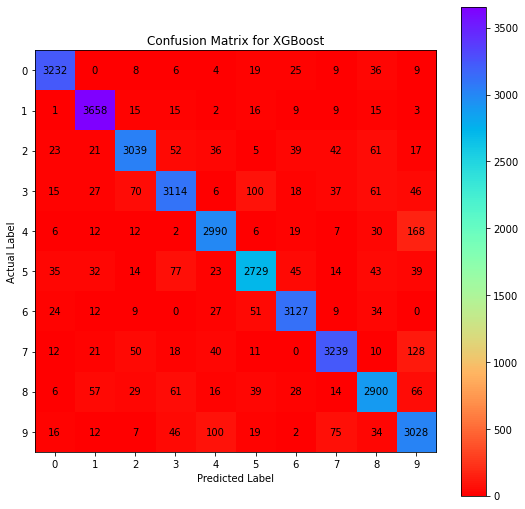

In [ ]:
plt.figure(figsize=(9,9))
plt.imshow(cm,cmap='rainbow_r')
plt.title("Confusion Matrix for XGBoost")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
trainaccuracy= accuracy_score(y_test, xgb.predict(X_test))
trainaccuracy
print("Test Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))

Test Data Accuracy    :92.43 %


In [ ]:
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'max_depth' : range(2, 8, 1),
    'n_estimators' : range(60, 160, 40),
    'learning_rate' : [0.1, 0.01, 0.05]
}

xgb_g = XGBClassifier()

xgb_grid = RandomizedSearchCV(xgb_g, param_distributions=params, cv=2, scoring='accuracy', verbose=3, random_state=0)

#xgb_grid = GridSearchCV(estimator=xgb_g, param_grid=params, n_jobs=-1, verbose=3, scoring='accuracy')

search = xgb_grid.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END learning_rate=0.05, max_depth=7, n_estimators=140;, score=0.922 total time= 4.0min
[CV 2/2] END learning_rate=0.05, max_depth=7, n_estimators=140;, score=0.926 total time= 4.1min
[CV 1/2] END learning_rate=0.01, max_depth=7, n_estimators=60;, score=0.881 total time= 1.7min
[CV 2/2] END learning_rate=0.01, max_depth=7, n_estimators=60;, score=0.883 total time= 1.7min
[CV 1/2] END learning_rate=0.05, max_depth=6, n_estimators=60;, score=0.903 total time= 1.5min
[CV 2/2] END learning_rate=0.05, max_depth=6, n_estimators=60;, score=0.911 total time= 1.5min
[CV 1/2] END learning_rate=0.01, max_depth=4, n_estimators=140;, score=0.864 total time= 2.3min
[CV 2/2] END learning_rate=0.01, max_depth=4, n_estimators=140;, score=0.871 total time= 2.3min
[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=140;, score=0.932 total time= 2.9min
[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=140;, score=0.936 tota

In [ ]:
search.best_estimator_

XGBClassifier(max_depth=5, n_estimators=140, objective='multi:softprob')

In [ ]:
params = {
    'max_depth' : range(4, 6, 1),
    'n_estimators' : range(100, 140, 20),
    'learning_rate' : [0.1, 0.05]
}

xgb_g = XGBClassifier(objective='multi:softprob')

#xgb_grid = RandomizedSearchCV(xgb_g, param_distributions=params, cv=2, scoring='accuracy', verbose=3, random_state=0)

xgb_grid = GridSearchCV(estimator=xgb_g, param_grid=params, n_jobs=-1, cv=3, verbose=1, scoring='accuracy')

search = xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
search.best_estimator_

XGBClassifier(max_depth=5, n_estimators=120, objective='multi:softprob')

In [ ]:
cm= metrics.confusion_matrix(y_test, search.best_estimator_.predict(X_test))
cm

array([[3253,    1,    7,    6,    5,   10,   18,    5,   39,    4],
       [   1, 3665,   14,   18,    8,    3,    6,    8,   13,    7],
       [  21,    7, 3131,   41,   29,    0,   28,   30,   34,   14],
       [   8,   11,   62, 3241,    7,   56,    5,   28,   44,   32],
       [   4,    9,   11,    2, 3079,    4,   19,    6,   16,  102],
       [  15,   20,   10,   46,    8, 2861,   30,   10,   29,   22],
       [  16,   11,    6,    0,   17,   41, 3175,    4,   23,    0],
       [   8,   13,   58,   16,   26,   10,    0, 3288,    8,  102],
       [   6,   27,   21,   30,    9,   26,   24,    8, 3014,   51],
       [  16,    7,    6,   41,   61,   18,    2,   46,   25, 3117]])

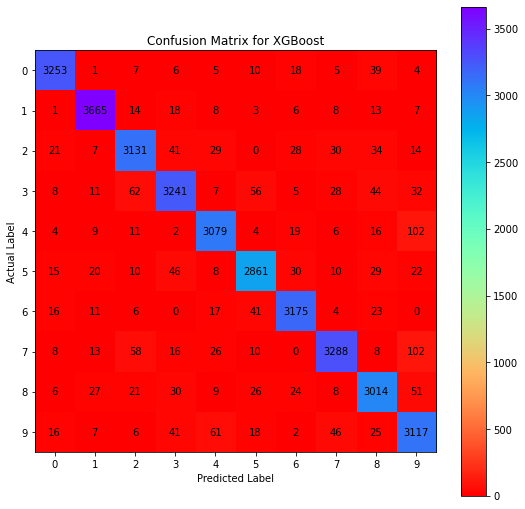

In [ ]:
plt.figure(figsize=(9,9))
plt.imshow(cm,cmap='rainbow_r')
plt.title("Confusion Matrix for XGBoost")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

In [ ]:
trainaccuracy= accuracy_score(y_test, search.best_estimator_.predict(X_test))
trainaccuracy
print("Test Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))

Test Data Accuracy    :94.71 %


In [ ]:
pca = PCA(n_components=20)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

xgb_pca = XGBClassifier()
xgb_pca.fit(X_train_pca, y_train)

xgb_baseline = XGBClassifier()
xgb_baseline.fit(X_train, y_train)

xgb_pca_g = XGBClassifier(objective='multi:softprob')
xgb_p = GridSearchCV(estimator=xgb_pca_g, param_grid=params, n_jobs=-1, cv=3, verbose=1, scoring='accuracy')
xgb_grid_pca = xgb_p.fit(X_train_pca, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
trainaccuracy= accuracy_score(y_test, xgb_baseline.predict(X_test))
print("Baseline XGB Accuracy    : {} %".format(round((trainaccuracy*100),2)))

trainaccuracy= accuracy_score(y_test, xgb_pca.predict(X_test_pca))
print("PCA XGB Accuracy    : {} %".format(round((trainaccuracy*100),2)))

trainaccuracy= accuracy_score(y_test, search.best_estimator_.predict(X_test))
print("Tuned XGB Accuracy    : {} %".format(round((trainaccuracy*100),2)))

trainaccuracy= accuracy_score(y_test, xgb_grid_pca.best_estimator_.predict(X_test_pca))
print("Tuned PCA XGB Accuracy    : {} %".format(round((trainaccuracy*100),2)))

Baseline XGB Accuracy    : 92.43 %
PCA XGB Accuracy    : 89.47 %
Tuned XGB Accuracy    : 94.71 %
Tuned PCA XGB Accuracy    : 92.26 %
